In [44]:
import pandas as pd
import json
from twython import Twython
import time
import os
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re

Code below to scrape tweets of followers (Users list)

In [2]:
# Code below adapated from: https://stackabuse.com/accessing-the-twitter-api-with-python/
# Load Twitter API credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object and provide Twitter credentials
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])

In [3]:
def get_users_tweets_json(username):
    # create empty dictionary to accept data
    dict_fol = {'created_at': [], 'verified': [], 'location': [], 'followers_count': [], 'tweet_text': [], 'retweet_count': [], 'favorite_count': []}  
    next_cursor = -1
    tweets = []
    result = ""
    while(next_cursor):
        try:
            result = twitter.get_user_timeline(screen_name=username, count = 200, cursor=next_cursor)
            for tweet in result:
                tweets.append(tweet)
            try: 
                time.sleep(5)
                next_cursor = result["next_cursor"]
                print("Getting more of %s's followers' tweets" % username)
                print (time.asctime())
            except:
                break
        except:
            f=open("ignore.txt","a+")
            f.write(username + "\n")
            f.close()
            break
    filename=username + "#" + str(time.time()) + "_tweets.json"
    
    with open("tweets/" + filename, "w") as file:
        json.dump(tweets, file)
        
    print("Saving %s's tweets to JSON file" % username)
    print (time.asctime())
    return result

In [ ]:
done_users = []
for i in os.listdir('tweets'):
    done_users.append(i.split("#")[0])
with open("mikegravel1561157054.0137448_followers.json", "r") as file: 
    followers = json.load(file)
for username in followers['screen_name']:
    print(username)
    if username not in done_users:
        tweets = get_users_tweets_json(username)
    else:
        print("Tweets of user : {} already saved".format(username))

andyverderosa
Tweets of user : andyverderosa already saved
mathrok
Tweets of user : mathrok already saved
g_stetz
Tweets of user : g_stetz already saved
slushfund_
Saving slushfund_'s tweets to JSON file
Fri Jul 12 21:32:42 2019
Ian_C_H
Saving Ian_C_H's tweets to JSON file
Fri Jul 12 21:32:43 2019
maikiko
Tweets of user : maikiko already saved
a_huge_goku
Tweets of user : a_huge_goku already saved
mrheffs
Saving mrheffs's tweets to JSON file
Fri Jul 12 21:32:43 2019
AhmedAddawlah
Saving AhmedAddawlah's tweets to JSON file
Fri Jul 12 21:32:45 2019
KrishMohanHaha
Tweets of user : KrishMohanHaha already saved
end_it_pls
Tweets of user : end_it_pls already saved
RalphCollins4
Tweets of user : RalphCollins4 already saved
ComradeAndy1848
Tweets of user : ComradeAndy1848 already saved
soolaymahn
Tweets of user : soolaymahn already saved
r_mill7
Saving r_mill7's tweets to JSON file
Fri Jul 12 21:32:45 2019
phillipneedham
Tweets of user : phillipneedham already saved
camdenmallin
Tweets of user

Saving BidenRebooted's tweets to JSON file
Fri Jul 12 21:33:03 2019
ComradeScumfuck
Tweets of user : ComradeScumfuck already saved
doggiemama17
Tweets of user : doggiemama17 already saved
hzaoImr
Tweets of user : hzaoImr already saved
dave_igliozzi
Saving dave_igliozzi's tweets to JSON file
Fri Jul 12 21:33:04 2019
KieranMoriarty3
Tweets of user : KieranMoriarty3 already saved
Pat_Kc
Tweets of user : Pat_Kc already saved
justrebeccalynn
Tweets of user : justrebeccalynn already saved
PrattMorgan
Tweets of user : PrattMorgan already saved
sashaperigo
Tweets of user : sashaperigo already saved
seinundcrypto
Tweets of user : seinundcrypto already saved
tkmhr
Tweets of user : tkmhr already saved
DefunctPhoton
Tweets of user : DefunctPhoton already saved
MilitiaChief
Tweets of user : MilitiaChief already saved
IslaGirl6
Tweets of user : IslaGirl6 already saved
SandiCurry15
Tweets of user : SandiCurry15 already saved
ch12o177e
Tweets of user : ch12o177e already saved
ughtumn
Tweets of user : 

Now that we have collected tweets of 1st layers of the followers of senator. Lets convert these files into corpus file.

In [5]:
tweets = [] # List of json objects
for jfile in os.listdir('tweets'):
    with open('tweets' + "/" + jfile) as json_file:
        try:
            data = json.load(json_file)
            for i in data:
                x = {"text":i['text'], "name":i['user']['name'],"screen_name":i['user']['screen_name'],"verified":i['user']['verified'],"geo":i['geo'], "coordinates": i['coordinates']}
                to_json = json.dumps(x)
                tweets.append(to_json)
        except ValueError as e:
            pass
print("Done making array of tweets!")

Done making array of tweets!


In [35]:
tweets_corpus = ""
tweets_verified_corpus = ""
tweets_unverified_corpus = ""
for tweet_data in tweets:
    tweet = json.loads(tweet_data)
    tweets_corpus = tweets_corpus + " " + tweet['text']
    if tweet['verified'] == True:
        tweets_verified_corpus = tweets_verified_corpus + " " + tweet['text']
    else:
        tweets_unverified_corpus = tweets_unverified_corpus + " " + tweet['text']

### Tweets Word Cloud

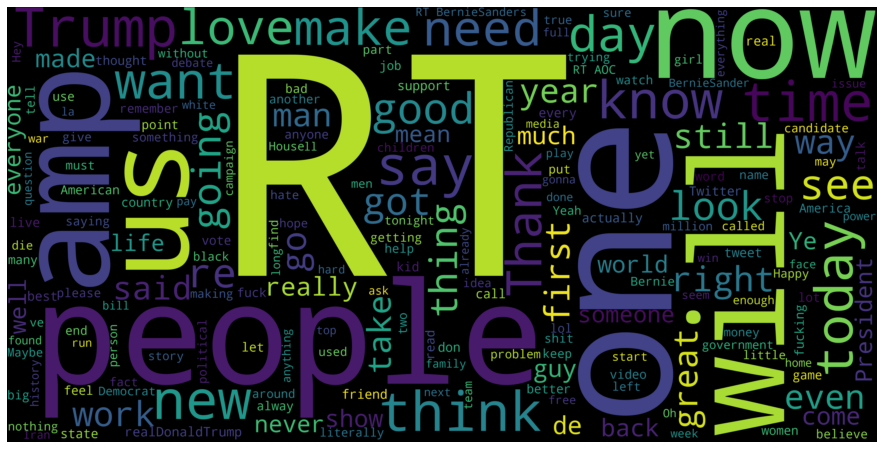

In [45]:
tweets_corpus = re.sub(r"http\S+", "", tweets_corpus) # remove links from tweets
tweets_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(tweets_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(tweets_wordcloud,interpolation='bilinear')
plt.axis('off');

### Univerified Users Tweets Word Cloud

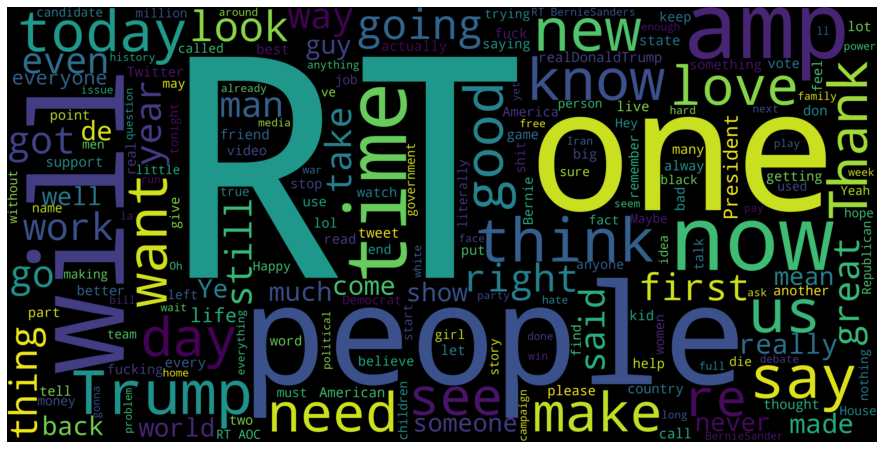

In [46]:
tweets_unverified_corpus = re.sub(r"http\S+", "", tweets_unverified_corpus)  # remove links from tweets
unverified_tweets_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(tweets_unverified_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(unverified_tweets_wordcloud,interpolation='bilinear')
plt.axis('off');

### Verified Users Tweets Word Cloud

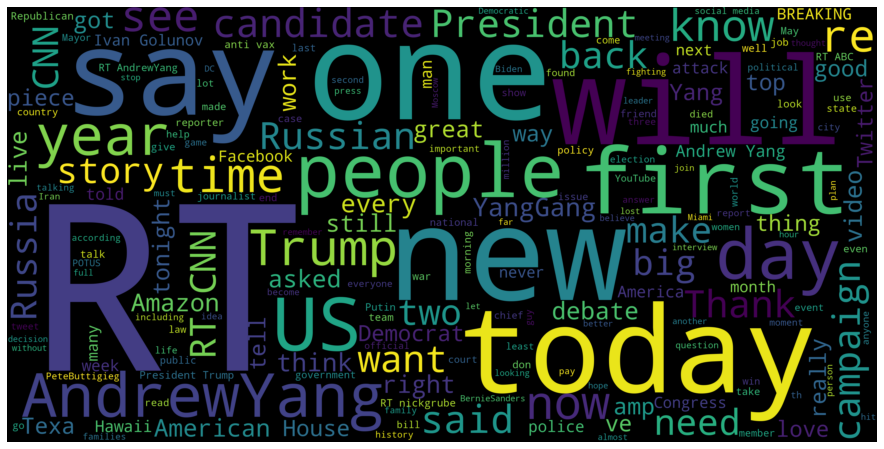

In [47]:
tweets_verified_corpus = re.sub(r"http\S+", "", tweets_verified_corpus)  # remove links from tweets
verified_tweets_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(tweets_verified_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(verified_tweets_wordcloud,interpolation='bilinear')
plt.axis('off');